# Super Spring Ultra Pro Max XXL

See Exercise 4.4 for the full statement.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Markov model

In [2]:
variables = ['position', 'velocity', 'acceleration', 'wind']

dt = 0.1
rho, kappa, eta = 0.1, 0.5, 0.1
alpha = 0.95
sigma_w = 10.0
sigma_e = 5.0

### Gaussian prior

$$p(x_0) = \mathcal{N}(x_0 | \mu_0, \Sigma_0)$$

In [ ]:
mu_0 = ...

Sigma_0 = ...

def prior():
    return np.random.multivariate_normal(mu_0, Sigma_0)

### Linear Gaussian transition model

$$p(x_t \vert x_{t - 1}) = \mathcal{N}(x_t | F x_{t - 1} + u, \Sigma_x)$$

In [ ]:
F = ...

u = ...

Sigma_x = ...

def transition(x):
    return np.random.multivariate_normal(F @ x + u, Sigma_x)

### Linear Gaussian sensor model

$$p(e_t \vert x_t) = \mathcal{N}(e_t | H x_t + v, \Sigma_e)$$

In [ ]:
H = ...

v = ...

Sigma_e = ...

def sensor(x):
    return np.random.multivariate_normal(H @ x + v, Sigma_e)

## Generation

In [6]:
def generate(steps):
    T = dt * np.arange(steps)
    X = [prior()]
    E = []

    for t in T[1:]:
        x = X[-1]
        x = transition(x)
        e = sensor(x)

        X.append(x)
        E.append(e)

    return T, np.stack(X), np.stack(E)

In [7]:
T, X, E = generate(1200)

## Kalman filtering

In [ ]:
def predict(mu, Sigma):
    ...

def update(mu, Sigma, e):
    ...

def kalman_filter(E):
    ...

In [9]:
MU, SIGMA = kalman_filter(E)

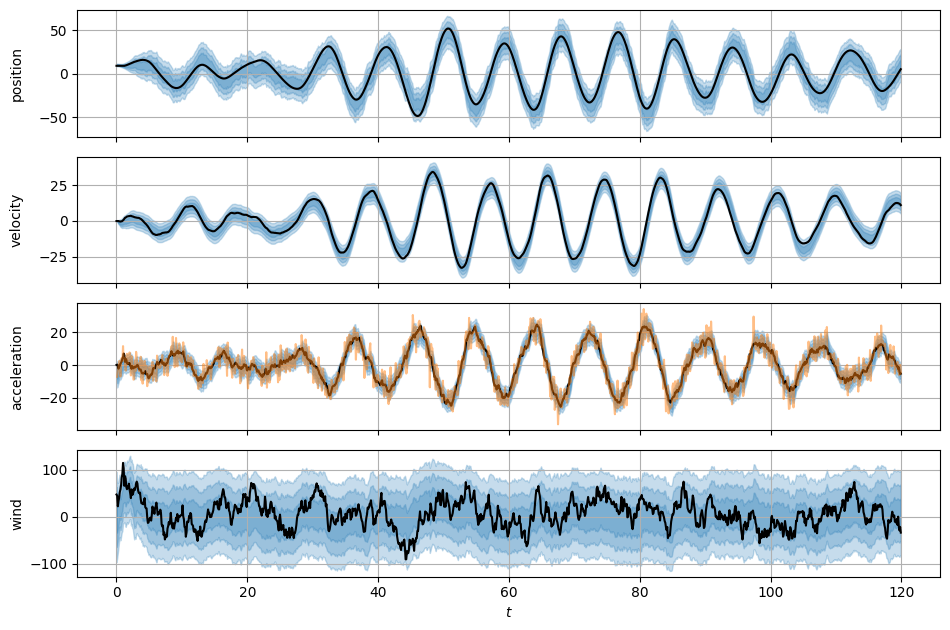

In [ ]:
# fig, axs = plt.subplots(4, figsize=(9.6, 6.4))

# for i in range(4):
#     axs[i].plot(T, X[:, i], 'k')
    
#     for j in (3, 2, 1):
#         axs[i].fill_between(T, MU[:, i] - j * np.sqrt(SIGMA[:, i, i]), MU[:, i] + j * np.sqrt(SIGMA[:, i, i]), color='C0', alpha=0.25)

#     if i == 2:
#         axs[i].plot(T[1:], E[:, 0], 'C1', alpha=0.5)
    
#     axs[i].grid()
#     axs[i].set_xlabel(r'$t$')
#     axs[i].set_ylabel(variables[i])
#     axs[i].label_outer()

# fig.align_labels()
# fig.tight_layout()